# SMD-Zettel Nr. 2

## Aufgabe 1 

### Aufgabenteil a)

In [107]:
import numpy as np
import matplotlib.pyplot as plt

Erstelle die aus der Vorlesung bekannte *LCG Funktion*. 
Mit dem Parameter `norm` kann eingestellt werden, ob die Zufallszahlen normiert sein sollen.
Der Parameter `test_eff` prüft die Periodenlänge der Zufallszahlen (noch langsam). 

In [89]:
def LCG(N, x_0, a, c, m, norm = False, test_eff = False): 
    random_numbers = []
    
    for i in range( int(N) ):
        if i != 0:
            x_plus = ( (a * random_numbers[-1] + c) % m )
            random_numbers.append(x_plus)
        else:
            x_plus = ( (a * x_0 + c) % m )
            random_numbers.append(x_plus)
            
        if test_eff == True:
            if len( np.array(random_numbers[:-1])[ np.array(random_numbers[:-1]) == random_numbers[i]] ) != 0:
                print('Doppeltes Element bei i =',i)
                break
        
    if norm == True:
        return np.array(random_numbers)/m
    
    return np.array(random_numbers)

Die Parameter sind [hier](https://en.wikipedia.org/wiki/Linear_congruential_generator) entommen worden.
Die Periodenlänge wurde zu $>10^5$ bestimmt.

In [148]:
# source: https://en.wikipedia.org/wiki/Linear_congruential_generator
x_0 = 1
a = 1664525
c = 1013904223
m = 2**32 #Ausschöpfung des 32 Bit Bereichs + Primzahl

numbers = LCG(1e6, x_0, a, c, m, True, False)

Auf ein festes Intervall $[x_0, x_1]$ können die  _normierten_ Zufallszahlen mittels der Funktion `linear_trafo` transformiert werden.

In [149]:
def linear_trafo(random_numbers, x_0, x_1):
    assert x_1 > x_0
    return (x_1 - x_0) * random_numbers + x_0

## Aufgabenteil b)

Die Normierungskonstante $N$ der Funktion $f(t)$
lautet $N=\frac{1}{\tau}$.
Die Transformationsvorschrift $T(u)$ für die erzeugten Zufallszahlen $u\in\left[0,1\right)$ erhält man wie folgt:

$$
\begin{aligned}
F(x)&=\int_{0}^{x} N \exp\left(-\frac{t}{\tau}\right)\mathrm{d}t\\
&=-\left(\exp\left(-\frac{x}{\tau}\right)-1\right)\\
F(x) &\overset{!}{=}u\\
\Leftrightarrow \quad x&=T(u):=-\tau\ln(1-u)
\end{aligned}
$$



In [152]:
def T_b(random_numbers, tau):
    return -tau * np.log(1 - random_numbers)

(array([7.31496e+05, 1.96374e+05, 5.29900e+04, 1.40390e+04, 3.70400e+03,
        9.94000e+02, 3.05000e+02, 6.80000e+01, 2.40000e+01, 6.00000e+00]),
 array([2.61468847e-06, 1.31617744e+01, 2.63235462e+01, 3.94853180e+01,
        5.26470899e+01, 6.58088617e+01, 7.89706335e+01, 9.21324053e+01,
        1.05294177e+02, 1.18455949e+02, 1.31617721e+02]),
 <a list of 10 Patch objects>)

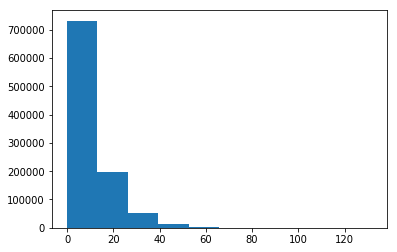

In [153]:
plt.hist(T_b(numbers, 10))

## Aufgabenteil c)

Die Nomrmierung $N$ der Funktion $f(x)$ lautet
$$ N = \frac{n-1}{x_{\mathrm{max}}^{-n+1}-x_{\mathrm{min}}^{-n+1}}$$

Die Transformationsformel $T(u)$ der Zufallszahlen $u$ ergibt sich wie folgt:

$$
\begin{aligned}
F(x)&=\int_{x_{\mathrm{min}}}^x N x'^{-n}\mathrm{d}x'\\
&=\frac{1}{ x_{ \mathrm{max} }^{-n+1} -x_{\mathrm{min}}^{-n+1} }\left(x^{-n+1}-x_{\mathrm{min}}^{-n+1}\right)\\
F(x)&\overset{!}{=}u\\
\Leftrightarrow \quad T(u):=x&=\left(\left(x_{ \mathrm{max} }^{-n+1} -x_{\mathrm{min}}^{-n+1} \right)u+x_{\mathrm{min}}\right)^{\frac{1}{1-n}}
\end{aligned}
$$

In [172]:
def T_c(random_numbers, x_min, x_max, n):
    assert x_max > x_min
    assert n > 1
    exponent = 1-n
    return ( (x_max**exponent - x_min**exponent) * random_numbers + x_min**exponent )**(1/exponent)

array([1.13407971, 1.22644511, 1.33711472, ..., 1.3281367 , 1.31980136,
       1.04454238])

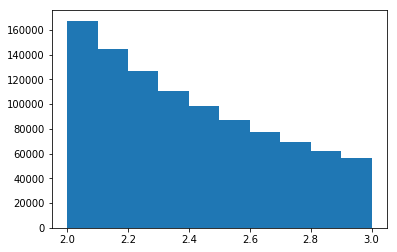

In [174]:
plt.hist(T_c(numbers, 2, 3, 3))
T_c(numbers, 1,2,2)